In [107]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

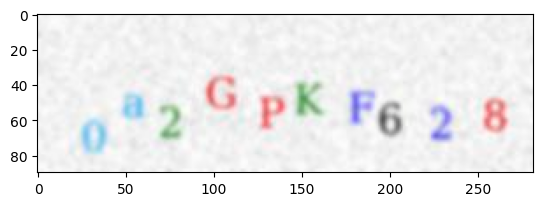

In [108]:
file_path = "../samples_2/0a2GPKF628.jpg"
file_name = (file_path.split('/')[-1])[:-4]

img = cv2.imread(file_path)

plt.imshow(img)

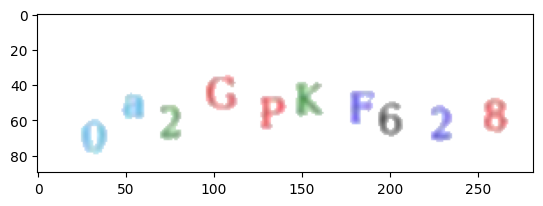

In [109]:
# make all gray pixel above 200 white
img[np.where((img > [200, 200, 200]).all(axis=2))] = [255, 255, 255]



plt.imshow(img)

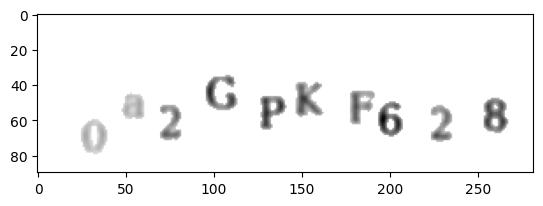

In [110]:
# convert to grayscale

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap='gray')

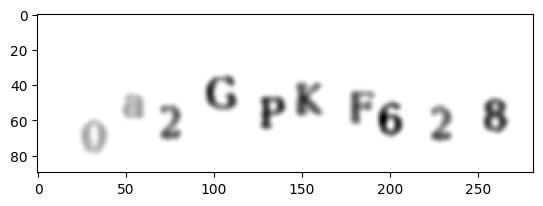

In [111]:
# blur image

blurred = cv2.GaussianBlur(gray, (5, 5), 0)

plt.imshow(blurred, cmap='gray')

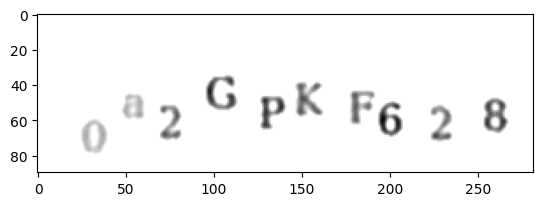

In [112]:
sharpen_kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
sharpen = cv2.filter2D(blurred, -1, sharpen_kernel)

plt.imshow(sharpen, cmap='gray')

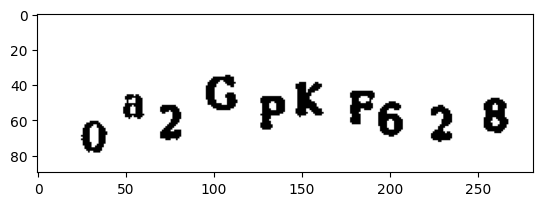

In [113]:
# threshold image
ret, thresh = cv2.threshold(sharpen, 220, 255, cv2.THRESH_BINARY)

plt.imshow(thresh, cmap='gray')

[]

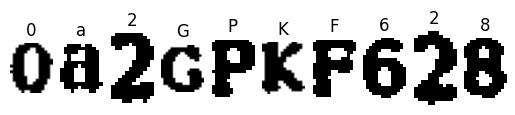

In [115]:
#img2 = img.copy()

mser = cv2.MSER_create()

regions, rects = mser.detectRegions(thresh)

# sort rectangles by left pixel
rects = sorted(rects, key=lambda x: x[0])

# subplot every rectangle
for i, rect in enumerate(rects):
    plt.subplot(1, len(rects), i + 1)
    plt.imshow(thresh[rect[1]:rect[1]+rect[3], rect[0]:rect[0]+rect[2]], cmap='gray')
    plt.title(file_name[i])
    plt.axis('off')

# show image
plt.plot()